# Group 17: 
### Eyad Medhat 221100279 / Hady Aly 221101190 / Mohamed Mahfouz 221101743 / Omar Mady 221100745

# 1- meta_data_preprocessing

In [1]:
from utils import *

Results folder exists at: d:\University\semester 9\IRS\AIE425_FinalProject_Group17\SECTION2_DomainRecommender\results
Subfolder exists: d:\University\semester 9\IRS\AIE425_FinalProject_Group17\SECTION2_DomainRecommender\results\tables


In [2]:
# # --- CONFIGURATION ---
# # Raw string for Windows path
# FILE_PATH = r"C:\Users\hadye\Downloads\meta_Health_and_Household.jsonl\meta_Health_and_Household.jsonl"
# OUTPUT_FILE = "health_household_processed.csv"
# CHUNK_SIZE = 10000

# # Logic A: Medical Exclusion Keywords (Strict Filter)
# # We exclude items if ANY of these terms appear in their categories
# EXCLUDED_CATEGORIES = {
#     'medication', 'pills', 'vitamins', 'supplements', 'drugs', 'pharmacy', 
#     'medicine', 'prescription', 'otc', 'capsules', 'tablets'
# }

# # Logic B: Green Lift Keywords (Sustainability Signals)
# # We verify items as green if they contain ANY of these keywords in their text blob
# GREEN_KEYWORDS = [
#     'climate pledge friendly', 'compact by design', 'biodegradable', 'epa safer choice', 
#     'rechargeable', 'reusable', 'compostable', 'plastic free', 'zero waste', 
#     'organic', 'energy star', 'bpa free', 'no butane', 'sustainable', 'ecologo', 
#     'cradle to cradle', 'made in green', 'gots certified'
# ]

# def is_green_product(text_blob):
#     """Checks if any green keyword exists in the text blob."""
#     if not isinstance(text_blob, str):
#         return 0
#     for keyword in GREEN_KEYWORDS:
#         if keyword in text_blob:
#             return 1
#     return 0

# def extract_image_url(images_list):
#     """Extracts the best available image URL (hi_res > large > thumb)."""
#     if isinstance(images_list, list) and len(images_list) > 0:
#         first_image = images_list[0]
#         # Prioritize high resolution, then large, then thumb
#         if isinstance(first_image, dict):
#             return first_image.get('hi_res') or first_image.get('large') or first_image.get('thumb')
#     return None

# def flatten_details(details_dict):
#     """Flattens the details dictionary into a string for TF-IDF."""
#     if isinstance(details_dict, dict):
#         # Convert {"Scent": "Lavender", "Brand": "X"} -> "Scent Lavender Brand X"
#         return " ".join([f"{k} {v}" for k, v in details_dict.items() if isinstance(v, str)])
#     return ""

# def process_chunk(chunk):
#     """Clean and process a single chunk of data."""
#     # 1. Feature Extraction & Text Normalization
    
#     # Text Fields
#     chunk['features_str'] = chunk['features'].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
#     chunk['description_str'] = chunk['description'].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
#     chunk['details_str'] = chunk['details'].apply(flatten_details)
    
#     # Combined Text Blob for TF-IDF (Key for Content-Based Filtering)
#     chunk['full_text'] = (
#         chunk['title'].fillna('') + " " + 
#         chunk['features_str'] + " " + 
#         chunk['description_str'] + " " + 
#         chunk['details_str']
#     ).str.lower()
    
#     # New Features
#     chunk['image_url'] = chunk['images'].apply(extract_image_url)
#     chunk['price'] = chunk['price'].astype(str).replace('nan', '') # Keep original string format like "$19.99"
#     chunk['store'] = chunk['store'].fillna('')
    
#     # 2. Logic B: Green Lift
#     chunk['is_green'] = chunk['full_text'].apply(is_green_product)
    
#     # 3. Logic A: Medical Exclusion Filter
#     # Create a string representation of categories for searching
#     chunk['categories_str'] = chunk['categories'].apply(lambda x: " ".join(x).lower() if isinstance(x, list) else "")
    
#     # Identify excluded rows
#     def has_excluded_term(cat_str):
#         if not cat_str: return False
#         for term in EXCLUDED_CATEGORIES:
#             if term in cat_str:
#                 return True
#         return False

#     mask_exclude = chunk['categories_str'].apply(has_excluded_term)
    
#     # Filter: Keep non-excluded items
#     clean_chunk = chunk[~mask_exclude].copy()
    
#     # Return only required columns
#     cols_to_keep = ['parent_asin', 'title', 'average_rating', 'rating_number', 'is_green', 'price', 'store', 'image_url']
    
#     # Select columns if they exist to be safe
#     existing_cols = [c for c in cols_to_keep if c in clean_chunk.columns]
    
#     return clean_chunk[existing_cols]

# def main():
#     print(f"Starting processing of {FILE_PATH}...")
    
#     total_processed_rows = 0
#     total_green_items = 0
#     chunk_count = 0
    
#     # Remove existing output file if it exists to start fresh
#     if os.path.exists(OUTPUT_FILE):
#         try:
#             os.remove(OUTPUT_FILE)
#             print(f"Removed existing output file: {OUTPUT_FILE}")
#         except OSError as e:
#             print(f"Error removing file: {e}")
#             return

#     try:
#         # Stream processing with chunks
#         # lines=True is required for JSONL
#         with pd.read_json(FILE_PATH, lines=True, chunksize=CHUNK_SIZE) as reader:
#             for chunk in reader:
#                 chunk_count += 1
                
#                 # Process the chunk
#                 processed_chunk = process_chunk(chunk)
                
#                 # Update stats
#                 rows_in_chunk = len(processed_chunk)
#                 green_in_chunk = processed_chunk['is_green'].sum()
                
#                 total_processed_rows += rows_in_chunk
#                 total_green_items += green_in_chunk
                
#                 # Save to CSV (Append mode)
#                 # Write header only for the first chunk
#                 header_mode = True if chunk_count == 1 else False
#                 processed_chunk.to_csv(OUTPUT_FILE, mode='a', header=header_mode, index=False)
                
#                 print(f"Processed chunk {chunk_count}... (Kept {rows_in_chunk} items, {green_in_chunk} green)")
                
#     except ValueError as e:
#         print(f"Error parsing JSON: {e}")
#         print("Make sure the file is a valid JSONL file.")
#     except FileNotFoundError:
#         print(f"File not found: {FILE_PATH}")
#         print("Please check the path and try again.")
#     except Exception as e:
#         print(f"An unexpected error occurred: {e}")
#     else:
#         print("\n--- Processing Complete ---")
#         print(f"Total clean rows saved: {total_processed_rows}")
#         print(f"Total Green items found: {total_green_items}")
#         if total_processed_rows > 0:
#             print(f"Green Item Percentage: {(total_green_items/total_processed_rows)*100:.2f}%")
#         print(f"Saved to: {os.path.abspath(OUTPUT_FILE)}")

# if __name__ == "__main__":
#     main()
    
    


# 2- reviews_preprocessing

In [3]:
# # --- CONFIGURATION ---
# PRODUCTS_FILE = "health_household_processed.csv"
# REVIEWS_FILE = r"C:\Users\hadye\Downloads\meta_Health_and_Household.jsonl\Health_and_Household.jsonl"
# OUTPUT_FILE = "reviews_processed.csv"
# CHUNK_SIZE = 50000 

# def load_valid_asins(products_path):
#     """Loads a set of valid parent_asins from the processed products file."""
#     print(f"Loading valid products from {products_path}...")
#     try:
#         # We only need the parent_asin column
#         df = pd.read_csv(products_path, usecols=['parent_asin'])
#         valid_asins = set(df['parent_asin'].unique())
#         print(f"Loaded {len(valid_asins)} valid unique ASINs.")
#         return valid_asins
#     except FileNotFoundError:
#         print(f"Error: Products file not found at {products_path}")
#         return set()

# def main():
#     valid_asins = load_valid_asins(PRODUCTS_FILE)
    
#     if not valid_asins:
#         print("No valid ASINs found. Aborting.")
#         return

#     print(f"Starting processing of reviews from {REVIEWS_FILE}...")
    
#     # Remove existing output file
#     if os.path.exists(OUTPUT_FILE):
#         try:
#             os.remove(OUTPUT_FILE)
#             print(f"Removed existing output file: {OUTPUT_FILE}")
#         except OSError:
#             pass

#     total_reviews = 0
#     kept_reviews = 0
#     chunk_count = 0
    
#     try:
#         # Stream processing
#         with pd.read_json(REVIEWS_FILE, lines=True, chunksize=CHUNK_SIZE) as reader:
#             for chunk in reader:
#                 chunk_count += 1
                
#                 # Filter: Keep reviews where parent_asin is in our valid set
#                 # Note: Reviews file has 'parent_asin' or 'asin'? 
#                 # According to inspection, keys are ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'verified_purchase', 'helpful_vote']
#                 # We use 'parent_asin' to join.
                
#                 # Ensure parent_asin is loaded
#                 if 'parent_asin' not in chunk.columns:
#                      print("Warning: 'parent_asin' column missing in chunk.")
#                      continue
                
#                 mask = chunk['parent_asin'].isin(valid_asins)
#                 filtered_chunk = chunk[mask]
                
#                 rows_in_chunk = len(chunk)
#                 rows_kept = len(filtered_chunk)
                
#                 total_reviews += rows_in_chunk
#                 kept_reviews += rows_kept
                
#                 if rows_kept > 0:
#                     # Select useful columns
#                     cols = ['parent_asin', 'user_id', 'rating', 'title', 'text', 'timestamp', 'verified_purchase', 'helpful_vote']
#                     existing_cols = [c for c in cols if c in filtered_chunk.columns]
                    
#                     header_mode = True if (chunk_count == 1) or (kept_reviews == rows_kept) else False 
#                     # Actually, header logic with chunking/skipping is tricky. 
#                     # Better: write header only if file is new.
#                     write_header = not os.path.exists(OUTPUT_FILE)
                    
#                     filtered_chunk[existing_cols].to_csv(OUTPUT_FILE, mode='a', header=write_header, index=False)
                
#                 print(f"Processed chunk {chunk_count} (Rows: {rows_in_chunk}, Kept: {rows_kept})")
                
#     except Exception as e:
#         print(f"Error processing reviews: {e}")
    
#     print("\n--- Reviews Processing Complete ---")
#     print(f"Total reviews scanned: {total_reviews}")
#     print(f"Total reviews saved: {kept_reviews}")
#     if total_reviews > 0:
#         print(f"Retention Rate: {(kept_reviews/total_reviews)*100:.2f}%")

# if __name__ == "__main__":
#     main()


# 3- join_meta_and_reviews

In [4]:
# # --- CONFIGURATION ---
# PRODUCTS_FILE = "health_household_processed.csv"
# REVIEWS_FILE = "reviews_processed.csv"
# OUTPUT_FILE = "merged_dataset.csv"

# def main():
#     print("Starting dataset merge...")
    
#     # Check if files exist
#     if not os.path.exists(PRODUCTS_FILE) or not os.path.exists(REVIEWS_FILE):
#         print(f"Error: Missing input files.\nProducts: {os.path.exists(PRODUCTS_FILE)}\nReviews: {os.path.exists(REVIEWS_FILE)}")
#         return

#     try:
#         print(f"Loading {PRODUCTS_FILE}...")
#         products = pd.read_csv(PRODUCTS_FILE)
#         print(f"Loaded {len(products)} products.")
        
#         print(f"Loading {REVIEWS_FILE}...")
#         # Reviews might be large, but let's try loading it as we filtered it significantly
#         reviews = pd.read_csv(REVIEWS_FILE)
#         print(f"Loaded {len(reviews)} reviews.")
        
#         print("Merging datasets on 'parent_asin'...")
#         # Inner join to keep only reviews for products we have (and vice-versa, though reviews were already filtered)
#         merged_df = pd.merge(reviews, products, on='parent_asin', how='inner')
        
#         print(f"Merge complete. Resulting shape: {merged_df.shape}")
        
#         print(f"Saving to {OUTPUT_FILE}...")
#         merged_df.to_csv(OUTPUT_FILE, index=False)
#         print("Success! Merged dataset saved.")
        
#         # Display sample
#         print("\nFirst 5 rows:")
#         print(merged_df.head())
        
#     except Exception as e:
#         print(f"An error occurred during merging: {e}")

# if __name__ == "__main__":
#     main()



# 4- Amazon_health&household Preprocessing

In [5]:
# Define paths relative to the current working directory
# Assuming the structure is:
# project/
# ├── data/
# │   └── Amazon_health&household.csv
# └── notebooks/
#     └── this_notebook.ipynb

# '..' moves one directory up from where this notebook is saved
RANDOM_SEED = 42
data_dir = os.path.join('..', 'data') 

input_file = os.path.join(data_dir, 'Amazon_health&household.csv')
preprocessed_file = os.path.join(data_dir, 'Amazon_health&household_preprocessed.csv')
sampled_file = os.path.join(data_dir, 'Amazon_health&household_label_encoded.csv')

print(f"Input path set to: {input_file}")

Input path set to: ..\data\Amazon_health&household.csv


In [6]:
print(f"Loading data from {input_file}...")

try:
    df = pd.read_csv(input_file)
    print("Data loaded successfully.")
    print("Initial shape:", df.shape)
except FileNotFoundError:
    print(f"Error: File not found at {input_file}. Please check your path.")

# Display the first few rows to inspect data
df.head()

Loading data from ..\data\Amazon_health&household.csv...


C:\Users\hadye\AppData\Local\Temp\ipykernel_4640\2440301609.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Data loaded successfully.
Initial shape: (7751115, 15)


,parent_asin,user_id,rating,title_x,text,timestamp,verified_purchase,helpful_vote,title_y,average_rating,rating_number,is_green,price,store,image_url
0,B0C85LM3CK,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,5,Yarn storage. Excellent.,I use these to store yarn projects. I’m very ...,2020-05-20 00:19:14.431,True,0,"Hefty Slider Jumbo Storage Bags, 2.5 Gallon Si...",4.8,22780,1,4.39,Hefty,https://m.media-amazon.com/images/I/71fQiCJcrj...
1,B01MT5XV33,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,5,Smells great!,Smells great!,2020-02-09 02:36:22.965,True,0,Febreze AIR Effects Air Freshener Heavy Duty C...,4.6,659,0,NaN,Febreze,https://m.media-amazon.com/images/I/817x7hr2Zk...
2,B0CBQN1MCY,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,5,Excellent!,Where has this been all my life? Makes wrappi...,2020-02-06 00:43:27.541,True,0,Glad Press'n Seal Plastic Food Wrap - 70 Squar...,4.7,12349,1,3.32,GLAD,https://m.media-amazon.com/images/I/61P0BHuoS2...
3,B0CBWPKH5K,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1,Yuck!,Amazon was out of my regular brand of Charmin ...,2019-06-26 03:26:44.596,True,3,Cottonelle Ultra ComfortCare Soft Toilet Paper...,4.5,28254,0,29.75,Cottonelle,https://m.media-amazon.com/images/I/81wbtrbCB-...
4,B0BV1PP5LQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,5,only brand I use,Like using a cloud on your nether regions. I ...,2019-03-18 03:02:30.254,True,0,"Charmin Ultra Gentle Toilet Paper, 18 Mega Rol...",4.7,43453,1,19.97,Charmin,https://m.media-amazon.com/images/I/81lm8f9Y5t...


In [7]:
print("Handling missing values...")

# 1. Handle Rating
if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    rating_mean = df['rating'].mean()
    df['rating'] = df['rating'].fillna(rating_mean)
    print(f"Filled missing ratings with mean: {rating_mean:.2f}")

# 2. Handle Price
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    price_mean = df['price'].mean()
    df['price'] = df['price'].fillna(price_mean)
    print(f"Filled missing prices with mean: {price_mean:.2f}")

# Check if any nulls remain in these columns
df[['rating', 'price']].isnull().sum()

Handling missing values...
Filled missing ratings with mean: 4.26
Filled missing prices with mean: 26.95


rating    0
price     0
dtype: int64

In [8]:
# Handle duplicates
print("Handling duplicates...")
initial_len = len(df)
df.drop_duplicates(inplace=True)
print(f"Dropped {initial_len - len(df)} duplicates.")

# Rename columns
print("Renaming columns...")
if 'title_y' in df.columns:
    df.rename(columns={'title_y': 'item'}, inplace=True)
    print("Renamed 'title_y' to 'item'")

Handling duplicates...
Dropped 33068 duplicates.
Renaming columns...
Renamed 'title_y' to 'item'


In [9]:
# Keep: user_id, item_id, rating, is_green, price, text
print("Filtering columns...")

cols_to_keep = ['user_id', 'item', 'rating', 'is_green', 'price', 'text']
# Filter to only keep columns that actually exist in the dataframe
existing_cols = [c for c in cols_to_keep if c in df.columns]

df = df[existing_cols]
print("Columns after filtering:", df.columns.tolist())
df.head()

Filtering columns...
Columns after filtering: ['user_id', 'item', 'rating', 'is_green', 'price', 'text']


,user_id,item,rating,is_green,price,text
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,"Hefty Slider Jumbo Storage Bags, 2.5 Gallon Si...",5,1,4.390000,I use these to store yarn projects. I’m very ...
1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,Febreze AIR Effects Air Freshener Heavy Duty C...,5,0,26.948325,Smells great!
2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,Glad Press'n Seal Plastic Food Wrap - 70 Squar...,5,1,3.320000,Where has this been all my life? Makes wrappi...
3,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,Cottonelle Ultra ComfortCare Soft Toilet Paper...,1,0,29.750000,Amazon was out of my regular brand of Charmin ...
4,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,"Charmin Ultra Gentle Toilet Paper, 18 Mega Rol...",5,1,19.970000,Like using a cloud on your nether regions. I ...


In [10]:
print("Performing Label Encoding on item...")

if 'item' in df.columns:
    le = LabelEncoder()
    # Convert to string to ensure consistency before encoding
    df['item'] = df['item'].astype(str)
    df['item_id_encoded'] = le.fit_transform(df['item'])
    print("Encoding complete.")
    
    # Save the full preprocessed file
    print(f"Saving preprocessed data to {preprocessed_file}...")
    df.to_csv(preprocessed_file, index=False)
else:
    print("Warning: 'item' column not found.")

Performing Label Encoding on item...
Encoding complete.
Saving preprocessed data to ..\data\Amazon_health&household_preprocessed.csv...


In [11]:
print("Sampling data...")

if 'user_id' in df.columns and 'item_id_encoded' in df.columns:
    # 1. Get top 10k users by frequency
    top_users = df['user_id'].value_counts().nlargest(10000).index
    df_sampled = df[df['user_id'].isin(top_users)]
    
    # 2. Get top 1k items by frequency within the user filtered data
    top_items = df_sampled['item_id_encoded'].value_counts().nlargest(1000).index
    df_sampled = df_sampled[df_sampled['item_id_encoded'].isin(top_items)]
    
    # 3. Sample 100k ratings if dataset is larger than that
    if len(df_sampled) > 100000:
        df_sampled = df_sampled.sample(n=100000, random_state=RANDOM_SEED)
    
    print("Final Sampled data shape:", df_sampled.shape)
    
else:
    print("Required columns for sampling (user_id, item_id) not found.")
    df_sampled = pd.DataFrame() # Create empty df to prevent errors in next cell

Sampling data...
Final Sampled data shape: (83355, 7)


In [12]:
if not df_sampled.empty:
    print(f"Saving sampled data to {sampled_file}...")
    df_sampled.to_csv(sampled_file, index=False)
    print("Process completed successfully.")
else:
    print("No data to save.")

df_sampled.head()

Saving sampled data to ..\data\Amazon_health&household_label_encoded.csv...
Process completed successfully.


,user_id,item,rating,is_green,price,text,item_id_encoded
96,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,"Dawn Ultra Dishwashing Liquid, Original Scent ...",4,0,22.77,Too expensive,107204
102,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,Charmin Ultra Soft Cushiony Touch Toilet Paper...,4,0,28.82,Very good paper but too expensiveoo,85026
103,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,Viva Signature Cloth Choose-A-Sheet Paper Towe...,4,0,23.65,Expensive but great towels,358978
106,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,Drano Max Gel Drain Clog Remover and Cleaner f...,2,0,15.47,The old Draino worked better. This pours easi...,117303
107,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,LiCB A23 23A 12V Alkaline Battery (5-Pack),4,0,5.99,"I jut got them, don’t know yet if they last long",204987


# Basic statistics:
### Number of users, items, ratings.

In [15]:
num_users = df_sampled['user_id'].nunique()
num_items = df_sampled['item_id_encoded'].nunique()
num_ratings = len(df_sampled)

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Number of ratings: {num_ratings}")

Number of users: 9591
Number of items: 1000
Number of ratings: 83355


### Sparsity level and rating distribution

Number of users: 9591
Number of items: 1000
Number of ratings: 83355
Sparsity level: 99.1309%


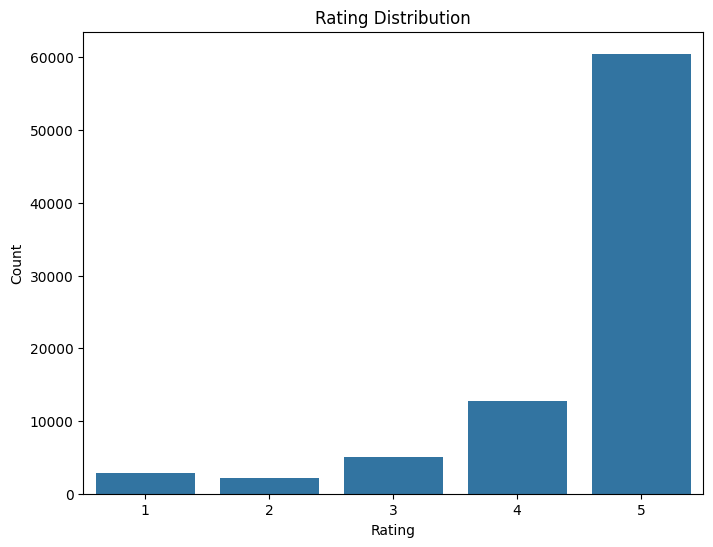

    Saved Plot: plots/rating_distribution.png


In [19]:
import seaborn as sns

# Calculate sparsity
total_possible_ratings = num_users * num_items
sparsity = 1 - (num_ratings / total_possible_ratings)

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Number of ratings: {num_ratings}")
print(f"Sparsity level: {sparsity:.4%}")

# Plot rating distribution
fig = plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_sampled)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

save_plot(fig,'rating_distribution.png')


# Basic Exploratory Analysis:

Saved distribution plot to ../results/plots/
    Saved Plot: plots/distribution_plot.png


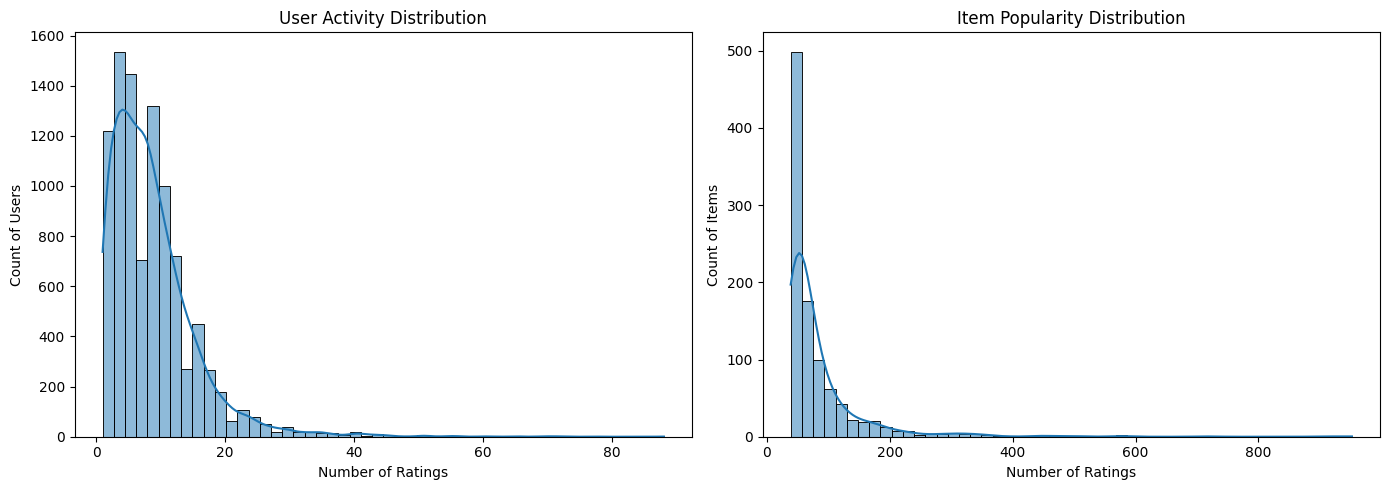

Saved log-log plot to ../results/plots/
    Saved Plot: plots/log_log_plot.png


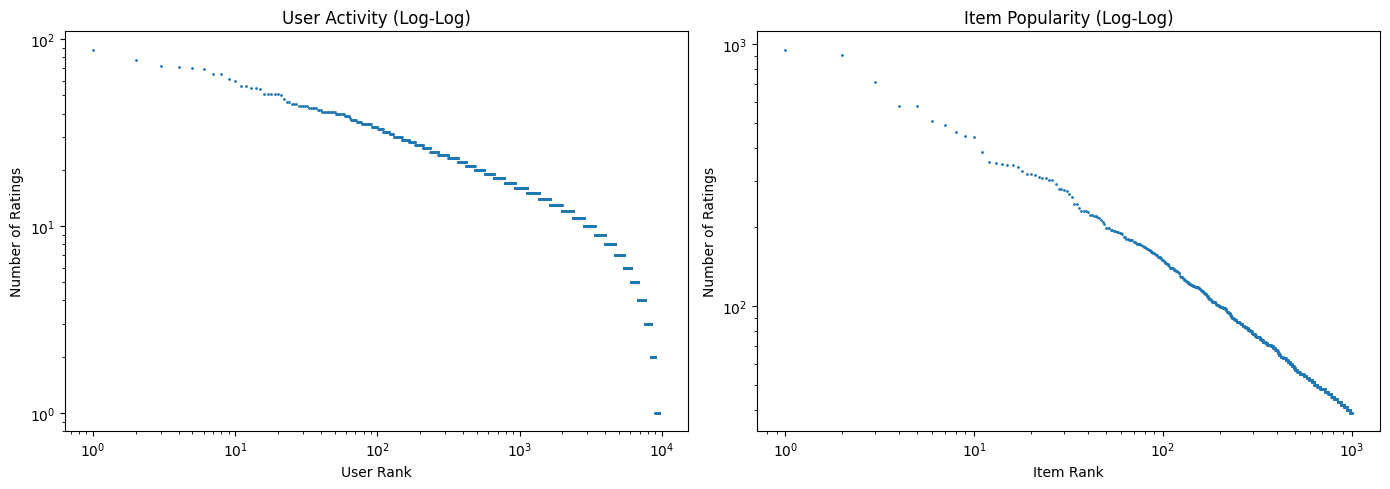


--- Long Tail Analysis Results ---
Total Items: 1000
Top 20% items count: 200
Ratings covered by top 20% items: 37612 (45.12%)
Observation: Distribution is relatively distributed (Short Tail).



In [30]:
# User Activity
user_counts = df_sampled['user_id'].value_counts()
# Item Popularity
item_counts = df_sampled['item_id_encoded'].value_counts()

# --- Plot 1: Distributions ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# User Activity Plot
sns.histplot(user_counts, bins=50, kde=True, ax=axes[0])
axes[0].set_title('User Activity Distribution')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Count of Users')

# Item Popularity Plot
sns.histplot(item_counts, bins=50, kde=True, ax=axes[1])
axes[1].set_title('Item Popularity Distribution')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Count of Items')

plt.tight_layout()
print(f"Saved distribution plot to ../results/plots/")
save_plot(plt, "distribution_plot")
plt.show()
plt.close()

# --- Plot 2: Log-Log (Power Law) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# User Activity Log-Log
# Sort values descending
user_counts_sorted = user_counts.sort_values(ascending=False).values
axes[0].loglog(range(1, len(user_counts_sorted) + 1), user_counts_sorted, marker='.', linestyle='none', markersize=2)
axes[0].set_title('User Activity (Log-Log)')
axes[0].set_xlabel('User Rank')
axes[0].set_ylabel('Number of Ratings')

# Item Popularity Log-Log
item_counts_sorted = item_counts.sort_values(ascending=False).values
axes[1].loglog(range(1, len(item_counts_sorted) + 1), item_counts_sorted, marker='.', linestyle='none', markersize=2)
axes[1].set_title('Item Popularity (Log-Log)')
axes[1].set_xlabel('Item Rank')
axes[1].set_ylabel('Number of Ratings')

plt.tight_layout()
print(f"Saved log-log plot to ../results/plots/")
save_plot(plt, "log_log_plot")
plt.show()
plt.close()

# --- Statistics ---
print("\n--- Long Tail Analysis Results ---")
top_20_percent_items = int(len(item_counts) * 0.2)
if top_20_percent_items == 0: top_20_percent_items = 1
    
# item_counts is sorted descending by default from value_counts()
ratings_from_top_20 = item_counts.head(top_20_percent_items).sum()
total_ratings = item_counts.sum()
percentage = (ratings_from_top_20 / total_ratings) * 100

summary_text = (
    f"Total Items: {len(item_counts)}\n"
    f"Top 20% items count: {top_20_percent_items}\n"
    f"Ratings covered by top 20% items: {ratings_from_top_20} ({percentage:.2f}%)\n"
    )
    
if percentage >= 80:
     summary_text += "Observation: Follows strict Pareto Principle (80/20 rule). Strong popularity bias.\n"
elif percentage > 50:
    summary_text += "Observation: Significant popularity bias (Long Tail effect present).\n"
else:
    summary_text += "Observation: Distribution is relatively distributed (Short Tail).\n"
    
print(summary_text)
    


 